In [44]:
import numpy as np
import matplotlib.pyplot as plt

## Messing around with likelihood of influx

Influx event defined as drawing $x^n \sim X^n$ AND $b^n \sim B^n$ such that $x^n = b^n$

In [7]:
def Bernoulli(q, size=1):
    return np.random.binomial(1, q, size=size)

def PBD(q_vals, size=1):
    """Sample from a Poisson Binomial Distribution parameterized on (q_1, ..., q_n).
    
    Returns:
        (size, n) array of binary values
    """
    out = np.zeros((size, len(q_vals)))
    for j, q in enumerate(q_vals):
        out[:,j] = Bernoulli(q, size=size)
    return out
    

In [6]:
Bernoulli(.4, size=10)

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1])

In [8]:
PBD([.2, .03, .06], size=10)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

### First: $P_{X_1 \dots X_n}$ is the uniform distrubtion except for P(0...0)

In [82]:
def zero_biased_uniform(n, p0, rows):
    """Sample from the distribution with P(0) = p0 and P(x != 0) = (1 - p0) / (2^n - 1)"""
#     out = np.random.randint(2, size=(rows, n))
    out = np.zeros((rows, n))
    for trial in range(rows):
        branch = np.random.rand(1)
        if branch > p0:
            new_row = np.random.randint(2, size=n)
            while sum(new_row) == 0:
                new_row = np.random.randint(2, size=n)
            out[trial, :] = new_row
        else:
            out[trial, :] = 0
            
    return out

ndraws = 10000
p_0 = .3

influx_fractions = []
outflux_fractions = []
zero_fractions = []
zero_prime_fractions = []

nmax = 20
system_sizes = np.arange(2, nmax)
# Set up a pre-determined set of bitflip probabilities so that this doesn't 
# affect the concentration of outflo
all_qvals = np.random.rand(nmax) * 0.10 # Uniform(0, 0.10)

for n in system_sizes:
#     zero_cts = int(p_0 * ndraws)
#     p0_vals = np.zeros((zero_cts, n))
#     other_vals = 
    Xvals = zero_biased_uniform(n, p_0, ndraws)
    
    # simulate bitflips
    qvals = all_qvals[:n]
    Bvals = PBD(qvals, size=ndraws)
    
    # Compute the original counts of 0...0
    locs_allzero = np.where(np.sum(Xvals, axis=1) == 0)[0]
    zero_counts = len(locs_allzero)
    zero_fractions.append(zero_counts )
    
    # Compute the counts of 0...0 after bitflips are applied  
    X_prime = (Xvals + Bvals) % 2 # simulates 'bitflips'
    zero_prime_counts = len(np.where(np.sum(X_prime, axis=1) == 0)[0])
    zero_prime_fractions.append(zero_prime_counts)
    
    # Compute the number of counts for which an all-zeros string was LOST due to outflux
    z_masked_B = Bvals[locs_allzero, :]
    outflux = len(np.where(np.sum(z_masked_B, axis=1) != 0)[0])
    outflux_fractions.append(outflux)
    
    # Compute the number of counts for which (b^n = x^n) AND (x^n != 0) which determines influx
    locs_nonzero = np.where(np.sum(Xvals, axis=1) != 0)[0]
    nz_masked_X = Xvals[locs_nonzero, :]
    nz_masked_B = Bvals[locs_nonzero, :]
    into_zero = (nz_masked_X + nz_masked_B) % 2 # all bitflips in the nonzero space

    influx = len(np.where(np.sum(into_zero, axis=1) == 0)[0])
    influx_fractions.append(influx)


In [83]:
print(zero_fractions)

[2957, 3057, 3035, 2984, 3008, 3015, 2985, 3002, 2919, 2934, 3022, 3028, 3016, 2959, 2988, 3002, 3072, 3009]


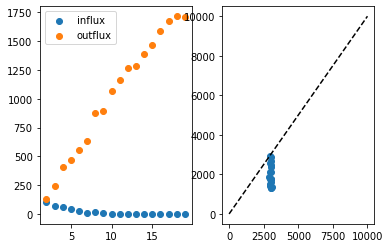

In [84]:
fig, axes = plt.subplots(1, 2)
axes[0].scatter(system_sizes, influx_fractions, label="influx")
axes[0].scatter(system_sizes, outflux_fractions, label="outflux")
axes[0].legend()

axes[1].scatter(zero_fractions, zero_prime_fractions)
axes[1].plot(range(ndraws), range(ndraws), ls='--', c='k')
# axes[1].scatter()

In [40]:
print(Xvals)
print(Bvals)
print(same_mask)

[[0 0 1 1 1]
 [1 0 1 1 1]
 [0 0 0 1 0]
 ...
 [1 1 1 1 0]
 [1 1 1 1 1]
 [1 0 0 1 1]]
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 1. 1.]
 [1. 0. 1. 1. 1.]
 [0. 0. 0. 1. 0.]
 ...
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1.]
 [1. 0. 0. 1. 1.]]


In [41]:
locs_same
print(influx)

126


In [33]:
Xvals[22]

array([0, 0, 1, 0, 0])

In [34]:
Bvals[22]

array([0., 0., 1., 0., 0.])

In [35]:
locs_same

(array([  22,   78,   85,   92,   94,  162,  242,  366,  385,  474,  547,
         553,  580,  661,  686,  697,  775,  784,  793,  961,  968, 1013,
        1024, 1070, 1095, 1110, 1196, 1208, 1224, 1256, 1304, 1310, 1338,
        1343, 1345, 1346, 1357, 1403, 1462, 1497, 1504, 1540, 1566, 1634,
        1675, 1721, 1798, 1815, 1828, 1857, 1866, 1868, 1926, 1927, 1947,
        2105, 2132, 2180, 2205, 2209, 2265, 2301, 2303, 2306, 2313, 2392,
        2477, 2541, 2577, 2579, 2944, 2983, 2990, 3012, 3022, 3036, 3041,
        3099, 3375, 3406, 3436, 3535, 3541, 3589, 3609, 3623, 3691, 3725,
        3779, 3832, 3875, 3957, 4003, 4007, 4014, 4023, 4052, 4061, 4213,
        4266, 4277, 4292, 4329, 4332, 4363, 4428, 4472, 4476, 4477, 4492,
        4532, 4549, 4580, 4664, 4684, 4686, 4693, 4697, 4700, 4703, 4708,
        4731, 4773, 4846, 4894, 4902]),)

In [ ]:
np.random